# Predicting Price of pre-Owned cars

In [1]:
# importing the various libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os

In [2]:
# changing the directory
os.chdir("D:\price prediction")

In [3]:
# setting dimension for plot
sns.set(rc = {'figure.figsize':(11.7, 8.27)})

In [4]:
# Reading the csv file
cars_data = pd.read_csv('cars_sampled.csv')
cars_data.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 0:00,34537,7/4/2016 4:44
4,16/03/2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16/03/2016 0:00,55270,1/4/2016 23:18


In [5]:
# checking the shape
cars_data.shape

(50001, 19)

In [6]:
# creating copy
cars = cars_data.copy()

In [7]:
# structure of the dataset
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

In [8]:
# summarize data
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,5.000100e+04,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000
mean,6.559865e+03,2005.544229,116.496130,125613.687726,5.743725,50775.216696
std,8.581847e+04,122.991832,230.567709,40205.234483,3.711345,25743.701933
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1.150000e+03,1999.000000,69.000000,125000.000000,3.000000,30559.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,49504.000000
75%,7.190000e+03,2008.000000,150.000000,150000.000000,9.000000,71404.000000
max,1.234568e+07,9999.000000,19312.000000,150000.000000,12.000000,99998.000000


In [9]:
pd.set_option('display.float_format', lambda x:'%.3f' %x)
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


In [10]:
# to display maximum number of columns
pd.set_option('display.max_columns',500)
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


In [11]:
# dropping the unwanted columns
col = ['name','dateCrawled','postalCode','lastSeen','dateCreated']
cars = cars.drop(columns = col, axis=1)

In [12]:
cars.shape

(50001, 14)

In [13]:
# removing duplicate records
cars.drop_duplicates(keep='first', inplace = True)

In [14]:
cars.shape

(49531, 14)

# Data Cleaning

In [15]:
# missing values
cars.isnull().sum()

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5152
yearOfRegistration        0
gearbox                2765
powerPS                   0
model                  2730
kilometer                 0
monthOfRegistration       0
fuelType               4467
brand                     0
notRepairedDamage      9640
dtype: int64

# Variable yearOfRegistration

In [16]:
# Sorting year wise
yearwise_counts = cars['yearOfRegistration'].value_counts().sort_index()
yearwise_counts

1000     6
1255     1
1500     2
1910    14
1928     1
        ..
7500     1
7800     1
8500     1
8888     2
9999     7
Name: yearOfRegistration, Length: 97, dtype: int64

In [17]:
# getting no. of registration in year range
sum(cars['yearOfRegistration']>2018)

26

In [18]:
sum(cars['yearOfRegistration']<1950)

38

<AxesSubplot:xlabel='yearOfRegistration', ylabel='price'>

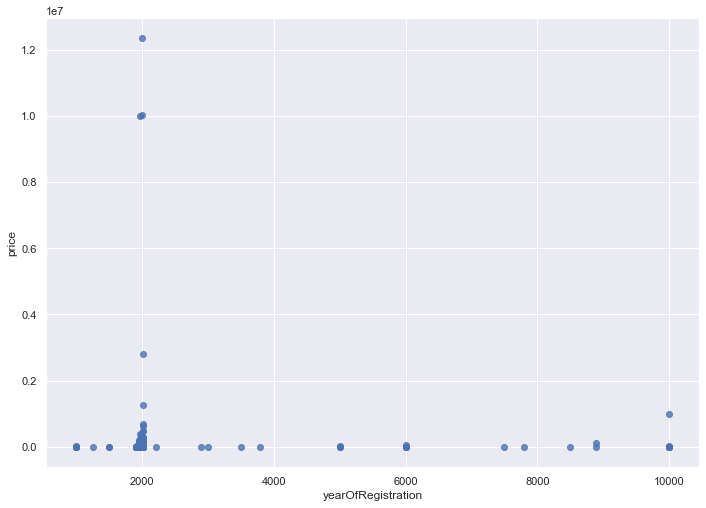

In [19]:
# getting the regression plot
sns.regplot(x = 'yearOfRegistration', y = 'price', scatter = True, fit_reg = False, data = cars)

# variable price

In [20]:
# sorting and getting the count for price
price_count = cars['price'].value_counts().sort_index()

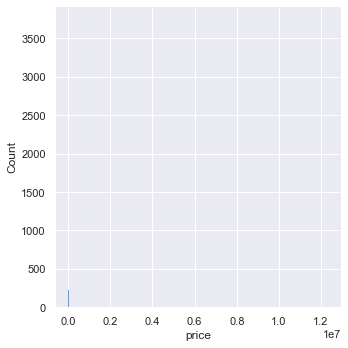

In [21]:
# creating displot
sns.displot(cars['price'])

In [22]:
# describing cars dataset
cars['price'].describe()

count      49531.000
mean        6567.220
std        86222.378
min            0.000
25%         1150.000
50%         2950.000
75%         7100.000
max     12345678.000
Name: price, dtype: float64

<AxesSubplot:ylabel='price'>

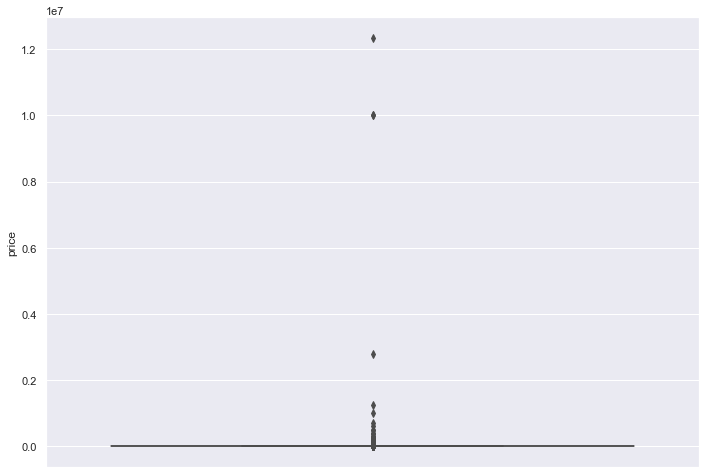

In [23]:
# creating boxplot
sns.boxplot(y=cars['price'])

In [24]:
# setting the working range
sum(cars['price']>150000)

34

In [25]:
sum(cars['price']<100)

1748

# Variable PowerPS

In [26]:
# sorting and count the powerPS
power_count = cars['powerPS'].value_counts().sort_index()

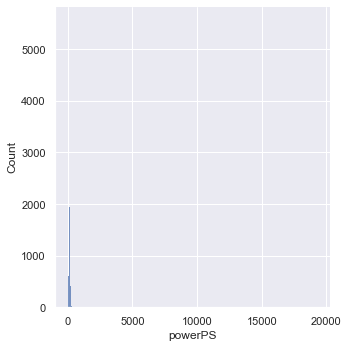

In [27]:
# creating displot
sns.displot(cars['powerPS'])

In [28]:
# describing the powerPS
cars['powerPS'].describe()

count   49531.000
mean      116.501
std       231.536
min         0.000
25%        69.000
50%       105.000
75%       150.000
max     19312.000
Name: powerPS, dtype: float64

<AxesSubplot:ylabel='powerPS'>

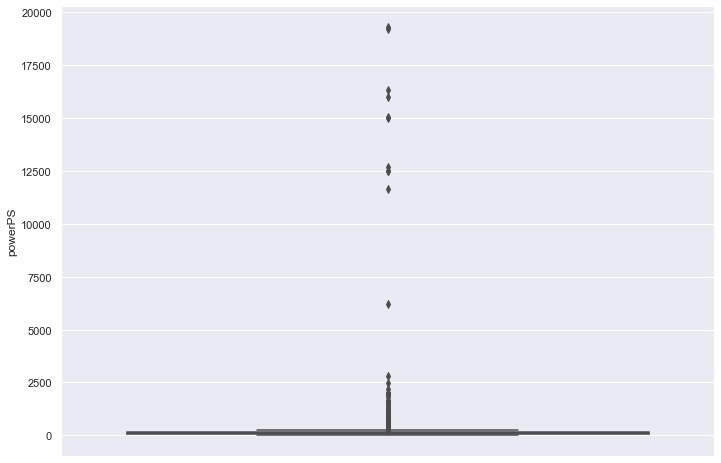

In [29]:
# creating boxplot
sns.boxplot(y = cars['powerPS'])

<AxesSubplot:xlabel='powerPS', ylabel='price'>

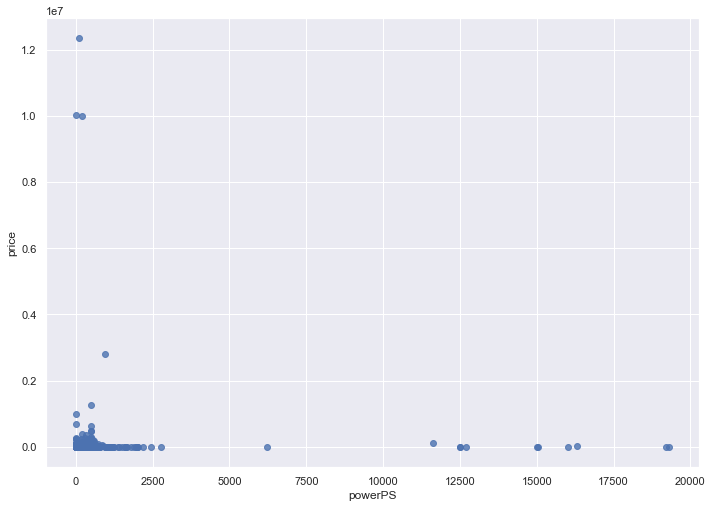

In [30]:
# creating regression plot
sns.regplot(x = 'powerPS', y = 'price', scatter = True, fit_reg = False, data = cars)

In [31]:
# fixing the range between 10 and 500
sum(cars['powerPS']>500)

115

In [32]:
sum(cars['powerPS']<10)

5565

# Working Range of Data

In [33]:
cars = cars[(cars.yearOfRegistration <= 2018)
           & (cars.yearOfRegistration >=1950)
           & (cars.price >=100)
           & (cars.price<=150000)
           & (cars.powerPS >=10)
           & (cars.powerPS <=500)]

In [34]:
cars.shape

(42772, 14)

In [35]:
# simplify variable reduction
# combining yearOfRegistration and monthOfRegistration

In [36]:
# Dividing monthOfRegistratrion by 12
cars['monthOfRegistration']/=12

In [37]:
# creating new variable 'Age' by adding yearOfRegistration and monthOfRegistration

cars['Age'] = (2018-cars['yearOfRegistration']) + cars['monthOfRegistration']
cars['Age'] = round(cars['Age'],2)

In [38]:
cars['Age'].describe()

count   42772.000
mean       14.873
std         7.093
min         0.000
25%        10.330
50%        14.830
75%        19.170
max        67.750
Name: Age, dtype: float64

In [39]:
# dropping the yearOfRegistration and monthOfRegistration

cars = cars.drop(columns = ['yearOfRegistration', 'monthOfRegistration'], axis  =1)

# Visualization parameter

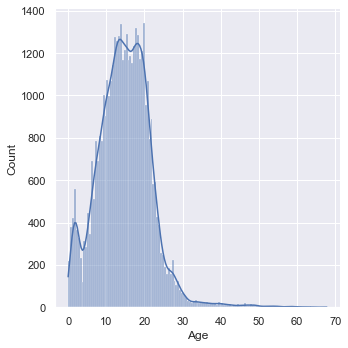

In [40]:
# displot of Age
sns.displot(cars['Age'], kde = True)

<AxesSubplot:ylabel='Age'>

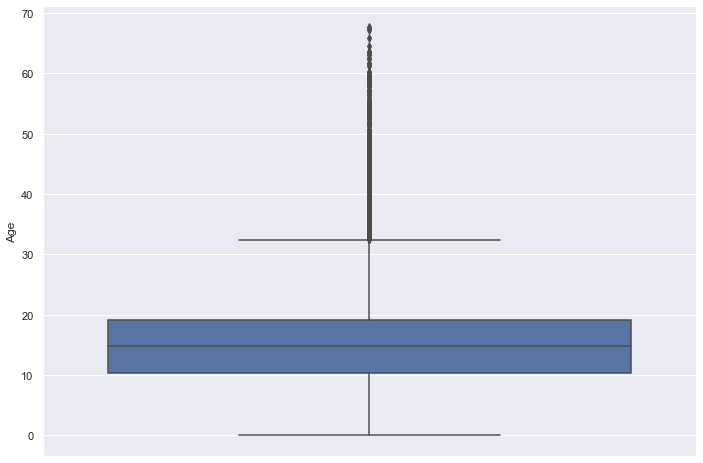

In [41]:
sns.boxplot(y = cars['Age'])

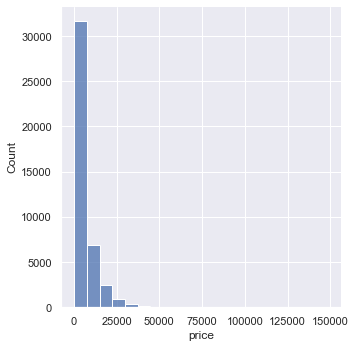

In [42]:
# price
sns.displot(cars['price'], bins = 20)

<AxesSubplot:ylabel='price'>

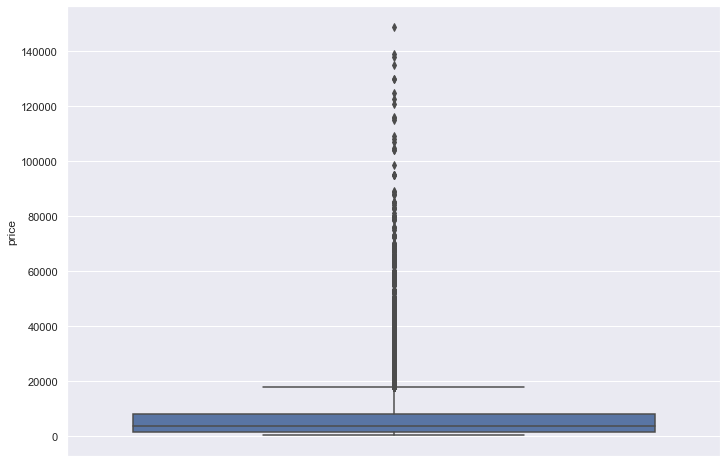

In [43]:
sns.boxplot(y=cars['price'])

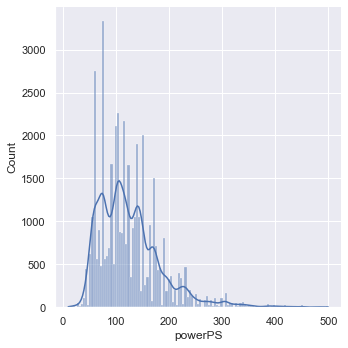

In [44]:
# powerPS
sns.displot(cars['powerPS'], kde = True)

<AxesSubplot:ylabel='powerPS'>

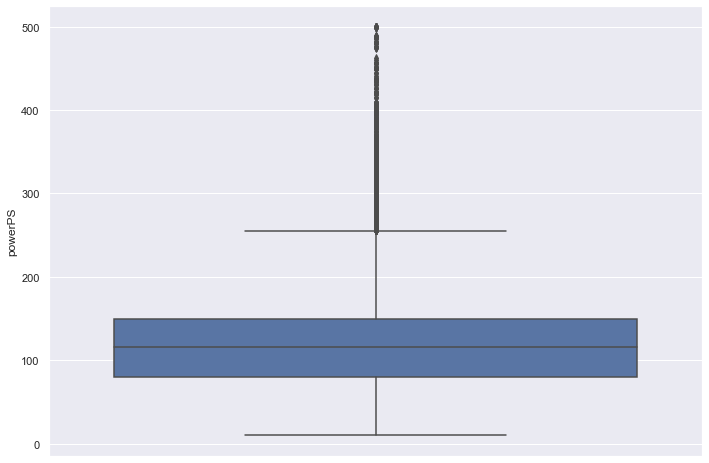

In [45]:
sns.boxplot(y = cars['powerPS'])

<AxesSubplot:xlabel='Age', ylabel='price'>

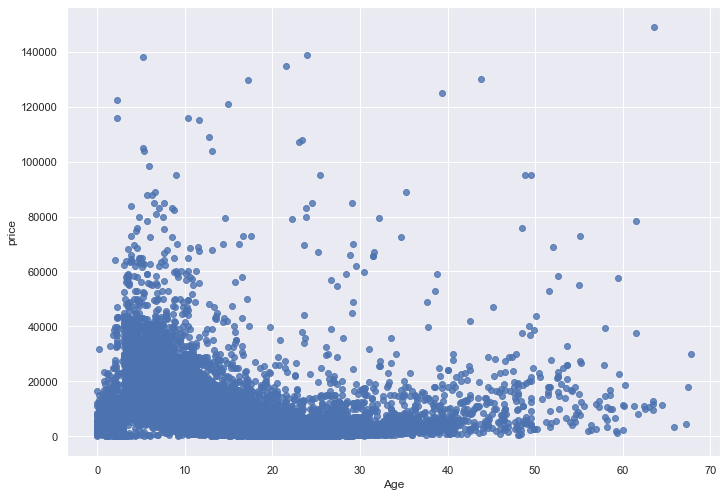

In [46]:
# visualization after narrowing the data 
# Age vs price
sns.regplot(x = 'Age', y = 'price', scatter = True, fit_reg = False, data = cars)

<AxesSubplot:xlabel='powerPS', ylabel='price'>

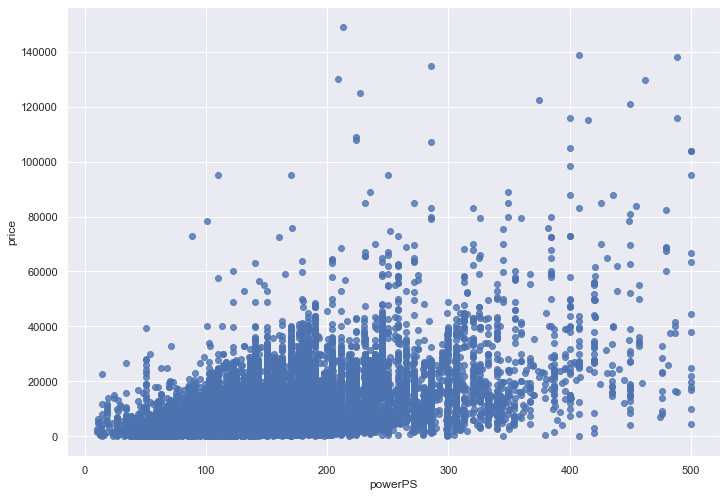

In [47]:
# powerPS vs price
sns.regplot(x = 'powerPS', y = 'price', scatter  =True, fit_reg = False, data = cars)

# variable seller

In [48]:
cars['seller'].value_counts()

private       42771
commercial        1
Name: seller, dtype: int64

In [49]:
pd.crosstab(index = cars['seller'], columns = 'count', normalize  =True)

col_0,count
seller,
commercial,0.000
private,1.000


<AxesSubplot:xlabel='seller', ylabel='count'>

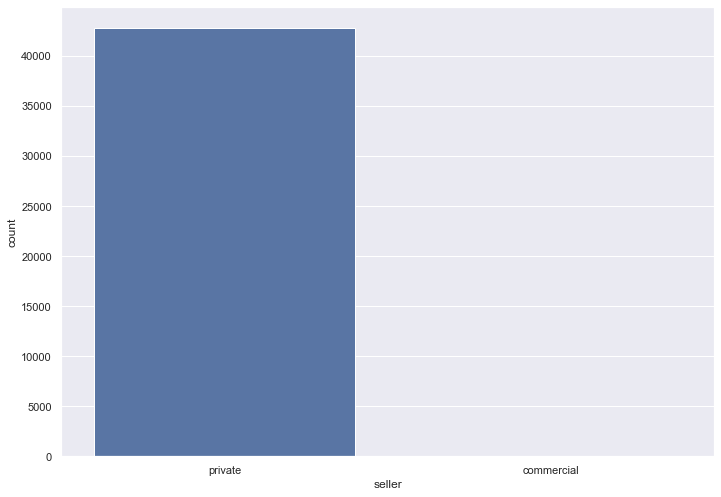

In [50]:
sns.countplot(x = 'seller', data = cars)

In [51]:
# variable offerType
cars['offerType'].value_counts()

offer    42772
Name: offerType, dtype: int64

<AxesSubplot:xlabel='offerType', ylabel='count'>

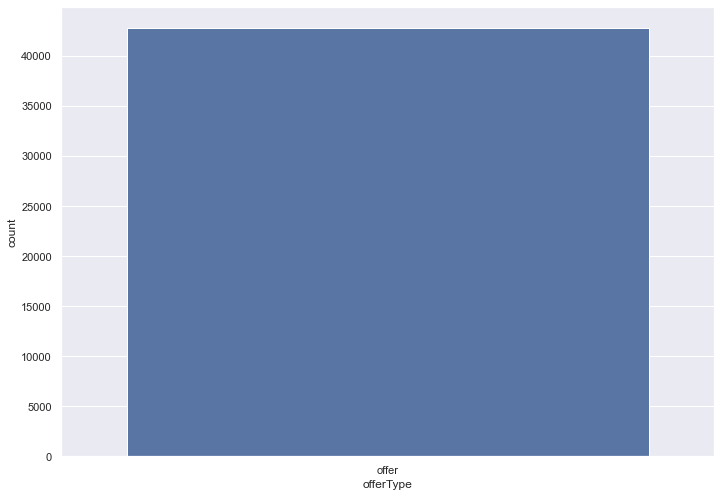

In [52]:
sns.countplot(x = 'offerType', data = cars)

In [53]:
# variable abtest
cars['abtest'].value_counts()

test       22128
control    20644
Name: abtest, dtype: int64

In [54]:
pd.crosstab(index = cars['abtest'], columns = 'count', normalize = True)

col_0,count
abtest,
control,0.483
test,0.517


<AxesSubplot:xlabel='abtest', ylabel='count'>

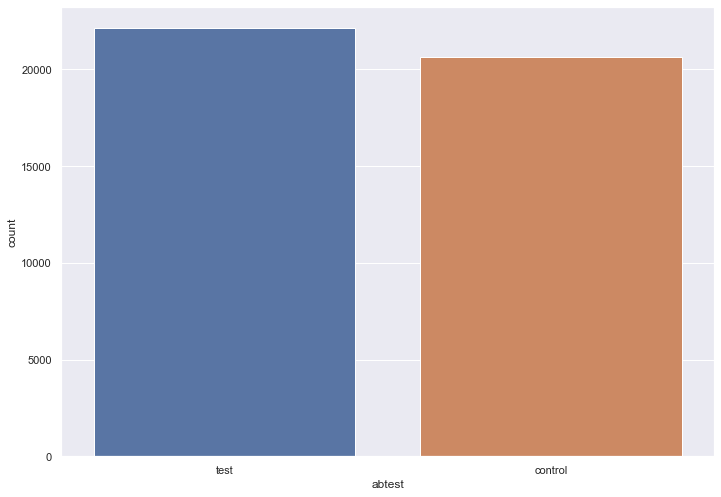

In [55]:
sns.countplot(x = 'abtest', data = cars)

<AxesSubplot:xlabel='abtest', ylabel='price'>

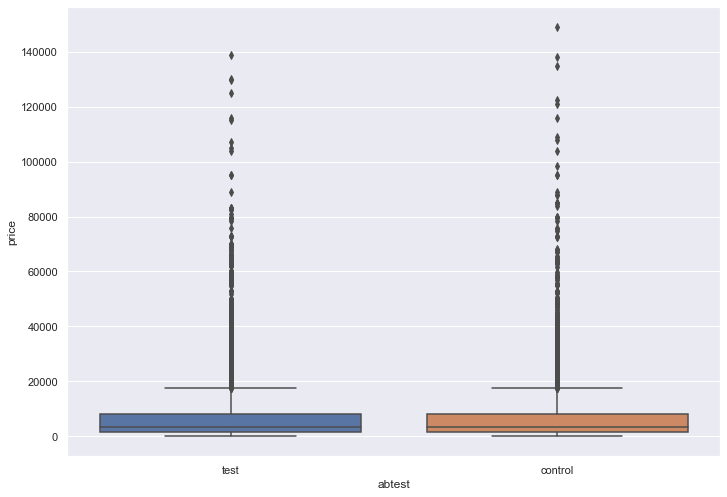

In [56]:
sns.boxplot(x = 'abtest', y = 'price', data = cars)

In [57]:
# variable vechicleType
cars['vehicleType'].value_counts()

limousine        11746
small car         9285
station wagon     8076
bus               3597
cabrio            2792
coupe             2261
suv               1813
others             326
Name: vehicleType, dtype: int64

In [58]:
pd.crosstab(index = cars['vehicleType'], columns = 'count', normalize = True)

col_0,count
vehicleType,
bus,0.090
cabrio,0.070
coupe,0.057
limousine,0.294
others,0.008
small car,0.233
station wagon,0.202
suv,0.045


<AxesSubplot:xlabel='vehicleType', ylabel='count'>

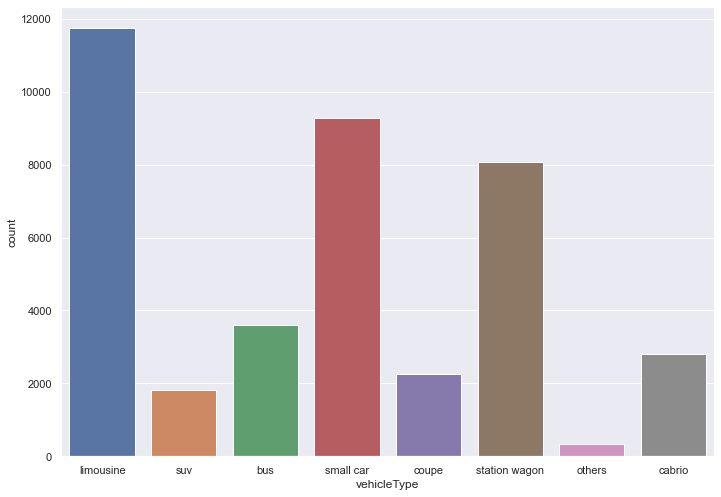

In [59]:
sns.countplot(x = 'vehicleType', data = cars)

<AxesSubplot:xlabel='vehicleType', ylabel='price'>

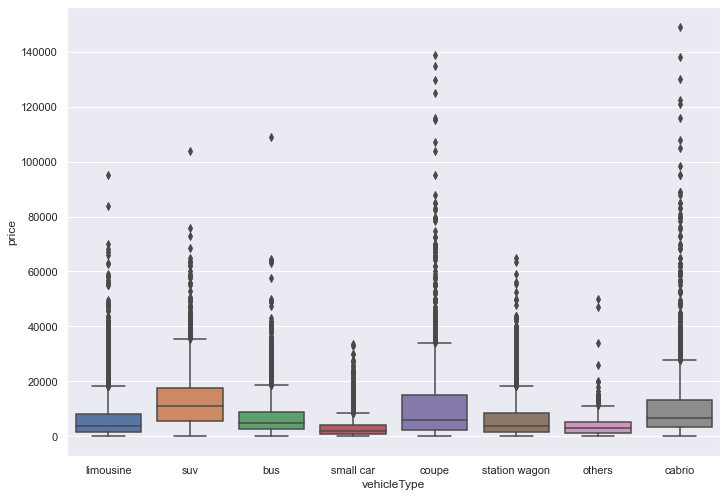

In [60]:
sns.boxplot(x = 'vehicleType', y = 'price', data = cars)

In [61]:
cars['gearbox'].value_counts()

manual       32582
automatic     9396
Name: gearbox, dtype: int64

In [62]:
pd.crosstab(index = cars['gearbox'], columns = 'count', normalize = True)

col_0,count
gearbox,
automatic,0.224
manual,0.776


<AxesSubplot:xlabel='gearbox', ylabel='count'>

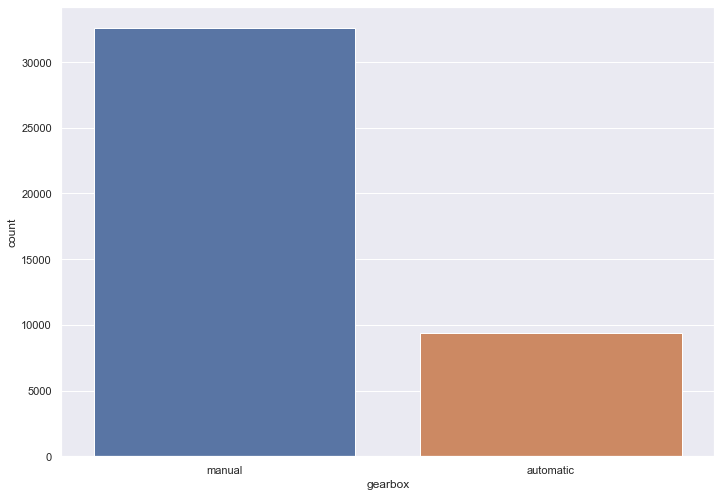

In [63]:
sns.countplot(x = 'gearbox', data = cars)

<AxesSubplot:xlabel='gearbox', ylabel='price'>

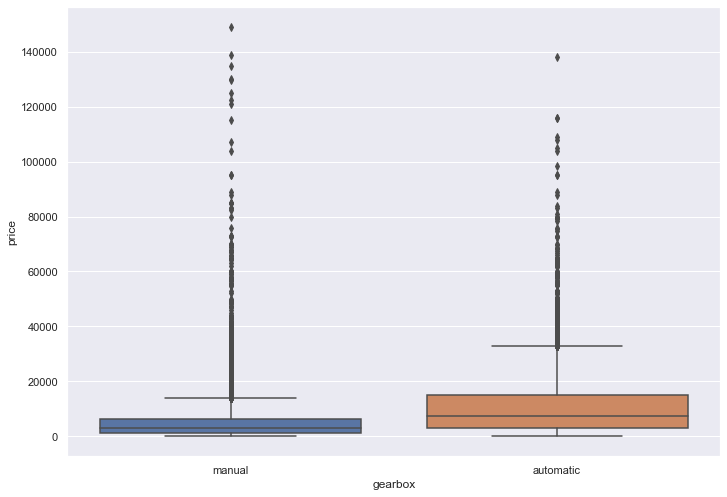

In [64]:
sns.boxplot(x = 'gearbox', y = 'price', data = cars)

In [65]:
# variable model
cars['model'].value_counts()

golf          3478
others        2900
3er           2482
polo          1500
corsa         1386
              ... 
b_max            1
serie_3          1
elefantino       1
charade          1
rangerover       1
Name: model, Length: 247, dtype: int64

In [66]:
pd.crosstab(index = cars['model'], columns = 'count', normalize = True)

col_0,count
model,
100,0.001
145,0.000
147,0.001
156,0.002
159,0.000
...,...
yaris,0.003
yeti,0.001
ypsilon,0.001


<AxesSubplot:xlabel='model', ylabel='count'>

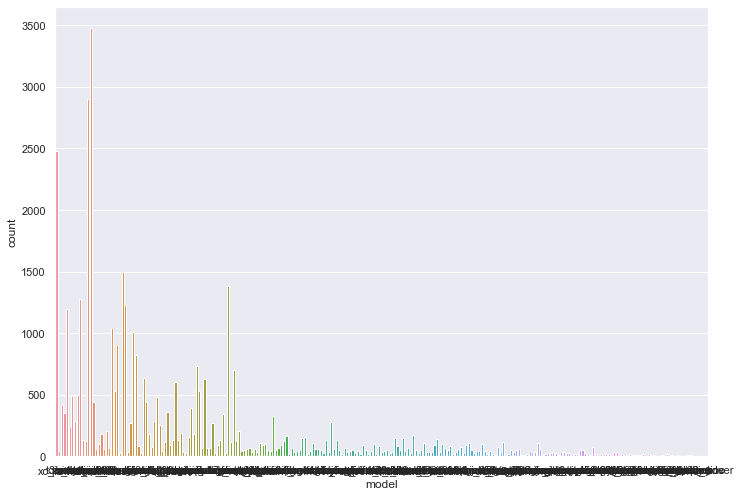

In [67]:
sns.countplot(x = 'model', data = cars)

<AxesSubplot:xlabel='model', ylabel='price'>

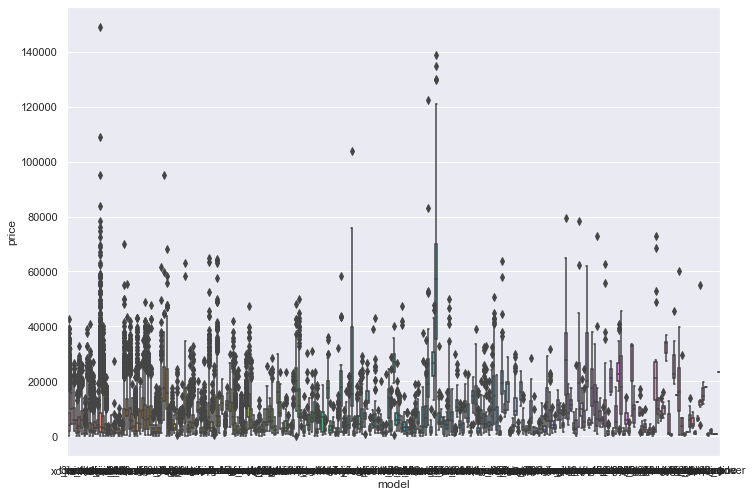

In [68]:
sns.boxplot(x = 'model', y = 'price', data = cars)

In [69]:
# variable kilometer
cars['kilometer'].value_counts()

150000    27430
125000     4597
100000     1824
90000      1484
80000      1378
70000      1182
60000      1101
50000       932
40000       795
30000       712
20000       651
5000        479
10000       207
Name: kilometer, dtype: int64

In [70]:
pd.crosstab(index = cars['kilometer'], columns = 'count', normalize = True)

col_0,count
kilometer,
5000,0.011
10000,0.005
20000,0.015
30000,0.017
40000,0.019
50000,0.022
60000,0.026
70000,0.028
80000,0.032


<AxesSubplot:xlabel='kilometer', ylabel='count'>

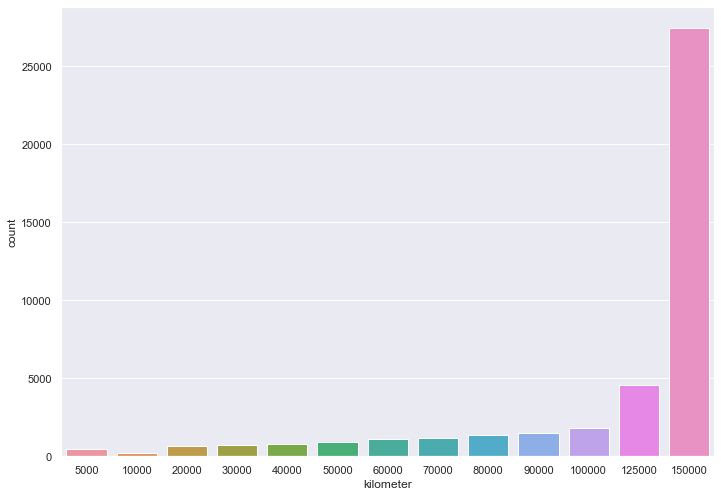

In [71]:
sns.countplot(x = 'kilometer', data = cars)

<AxesSubplot:xlabel='kilometer', ylabel='price'>

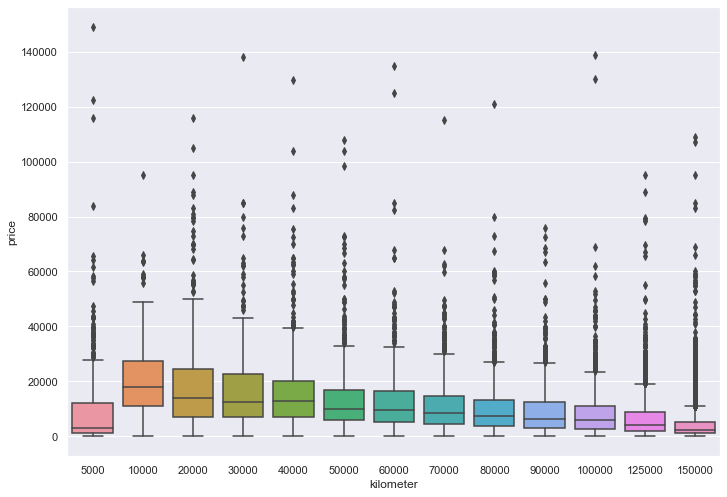

In [72]:
sns.boxplot(x = 'kilometer', y = 'price', data = cars)

In [73]:
cars['kilometer'].describe()

count    42772.000
mean    125815.253
std      39078.120
min       5000.000
25%     100000.000
50%     150000.000
75%     150000.000
max     150000.000
Name: kilometer, dtype: float64

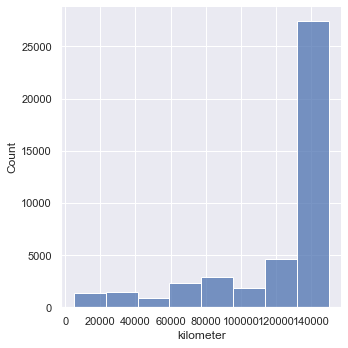

In [74]:
sns.displot(x = 'kilometer', bins = 8, kde = False, data = cars)

In [75]:
# variable fuelType
cars['fuelType'].value_counts()

petrol     26509
diesel     12854
lpg          690
cng           70
hybrid        36
electro       10
other          6
Name: fuelType, dtype: int64

In [76]:
pd.crosstab(index = cars['fuelType'], columns = 'count', normalize = True)

col_0,count
fuelType,
cng,0.002
diesel,0.320
electro,0.000
hybrid,0.001
lpg,0.017
other,0.000
petrol,0.660


<AxesSubplot:xlabel='fuelType', ylabel='count'>

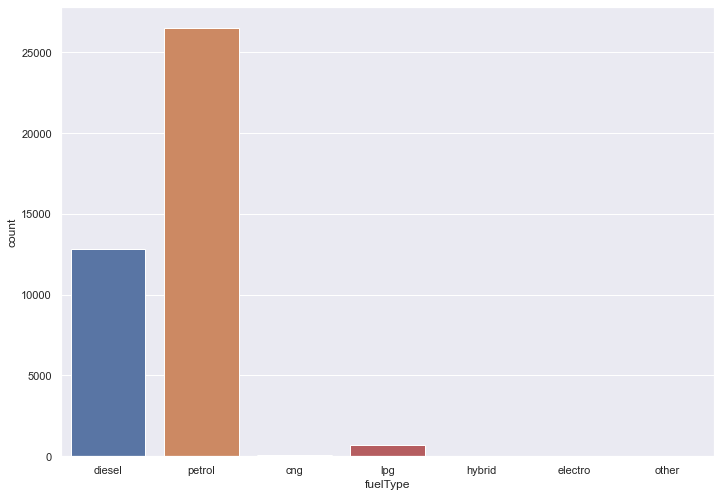

In [77]:
sns.countplot(x = 'fuelType', data = cars)

<AxesSubplot:xlabel='fuelType', ylabel='price'>

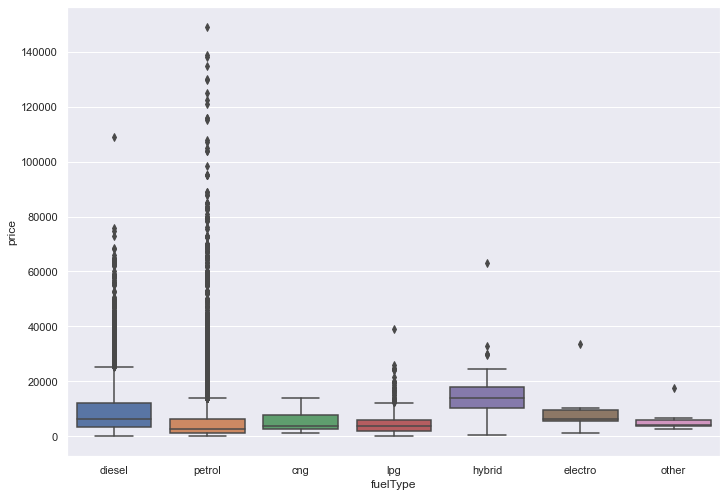

In [78]:
sns.boxplot(x = 'fuelType', y = 'price', data = cars)

In [79]:
# variable brand
cars['brand'].value_counts()

volkswagen        9134
bmw               4868
opel              4487
mercedes_benz     4134
audi              3984
ford              2815
renault           1941
peugeot           1323
fiat               996
seat               886
skoda              698
mazda              663
smart              623
nissan             601
citroen            598
toyota             547
volvo              429
mini               428
hyundai            406
mitsubishi         359
honda              300
sonstige_autos     299
kia                276
suzuki             264
porsche            260
alfa_romeo         245
chevrolet          213
chrysler           151
dacia              123
subaru             112
jeep                91
land_rover          81
jaguar              78
daihatsu            67
saab                65
lancia              56
rover               53
daewoo              53
trabant             43
lada                22
Name: brand, dtype: int64

In [80]:
pd.crosstab(index = cars['brand'], columns = 'count', normalize = True)

col_0,count
brand,
alfa_romeo,0.006
audi,0.093
bmw,0.114
chevrolet,0.005
chrysler,0.004
citroen,0.014
dacia,0.003
daewoo,0.001
daihatsu,0.002


<AxesSubplot:xlabel='brand', ylabel='count'>

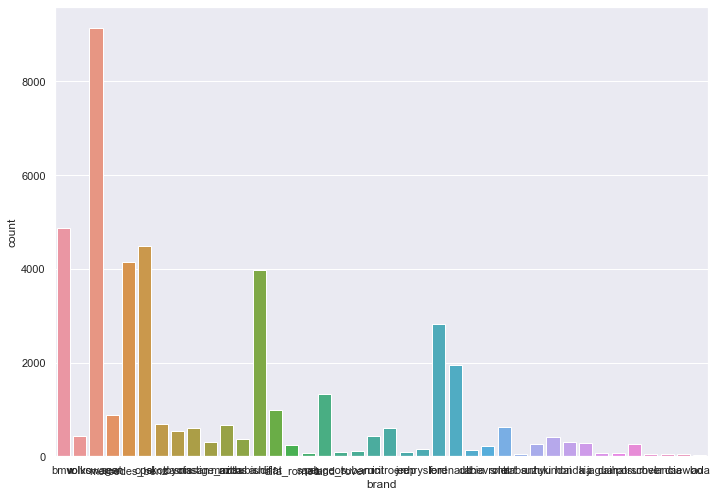

In [81]:
sns.countplot(x = 'brand', data = cars)

<AxesSubplot:xlabel='brand', ylabel='price'>

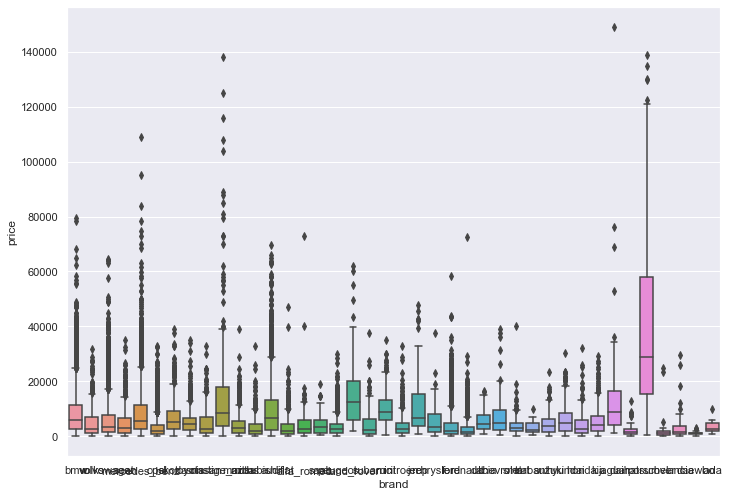

In [82]:
sns.boxplot(x = 'brand', y = 'price', data = cars)

In [83]:
# variable notRepairedDamage
cars['notRepairedDamage'].value_counts()

no     32507
yes     3988
Name: notRepairedDamage, dtype: int64

In [84]:
pd.crosstab(index = cars['notRepairedDamage'], columns = 'count', normalize = True)

col_0,count
notRepairedDamage,
no,0.891
yes,0.109


<AxesSubplot:xlabel='notRepairedDamage', ylabel='count'>

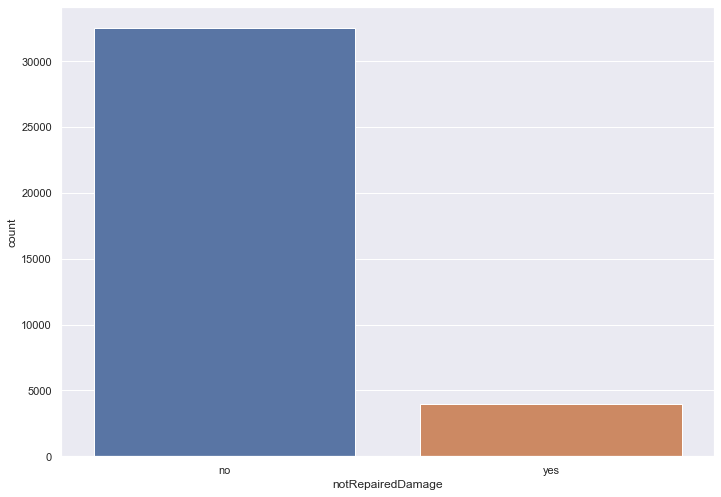

In [85]:
sns.countplot(x = 'notRepairedDamage', data = cars)

<AxesSubplot:xlabel='notRepairedDamage', ylabel='price'>

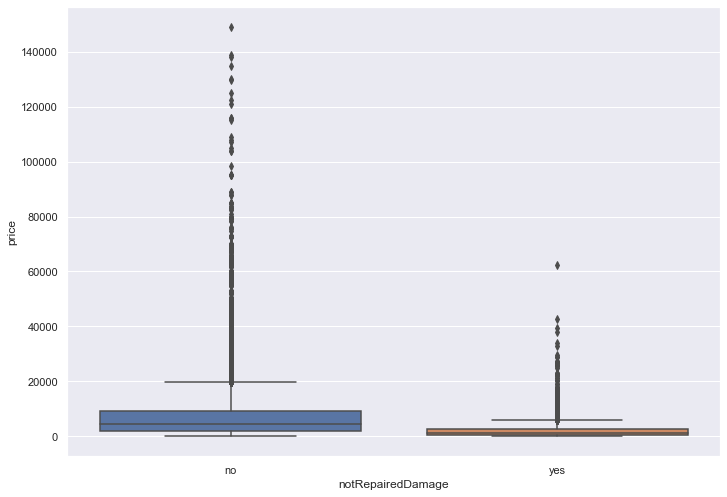

In [86]:
sns.boxplot(x = 'notRepairedDamage', y = 'price', data = cars)

In [87]:
# removing insignificant columns
col = ['seller', 'abtest', 'offerType']

In [88]:
cars = cars.drop(columns = col, axis = 1)

In [89]:
cars_copy = cars.copy()

In [90]:
cars_copy.shape

(42772, 10)

# Correlation

In [91]:
cars_select1 = cars.select_dtypes(exclude = [object])

In [92]:
correlation = cars_select1.corr()

In [93]:
round(correlation,3)

,price,powerPS,kilometer,Age
price,1.000,0.575,-0.440,-0.336
powerPS,0.575,1.000,-0.016,-0.151
kilometer,-0.440,-0.016,1.000,0.292
Age,-0.336,-0.151,0.292,1.000


In [94]:
cars_select1.corr().loc[:,'price'].abs().sort_values(ascending = False)[1:]

powerPS     0.575
kilometer   0.440
Age         0.336
Name: price, dtype: float64

# BUILDING LINEAR REGRESSION AND RANDOM FOREST MODEL

In [95]:
# TAKING TWO DATA SET
# ONE BY OMITTING THE MISSING VALUE
# SECONG BY IMPUTING THE MISSING VALUE

In [96]:
# OMITTING MISSING VALUES
car_omit = cars.dropna(axis=0)

In [97]:
# converting categorical variable to dumy variables
car_omit =pd.get_dummies(car_omit, drop_first = True)

In [98]:
# importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [99]:
# seperating input and output features
x1 = car_omit.drop(['price'], axis = 'columns', inplace = False)

In [100]:
y1 = car_omit['price']

# MODEL BUILDING WITH OMITTED DATA

In [101]:
# plotting the variable

In [102]:
# converting it to dataframe first
prices = pd.DataFrame({"1.Before":y1, "2.After":np.log(y1)})

In [103]:
print(prices)

       1.Before  2.After
1         13299    9.495
3          4500    8.412
4         18750    9.839
5           988    6.896
7          1399    7.244
...         ...      ...
49991     10900    9.297
49992       790    6.672
49993       830    6.721
49995      2290    7.736
50000      1100    7.003

[32884 rows x 2 columns]


array([[<AxesSubplot:title={'center':'1.Before'}>,
        <AxesSubplot:title={'center':'2.After'}>]], dtype=object)

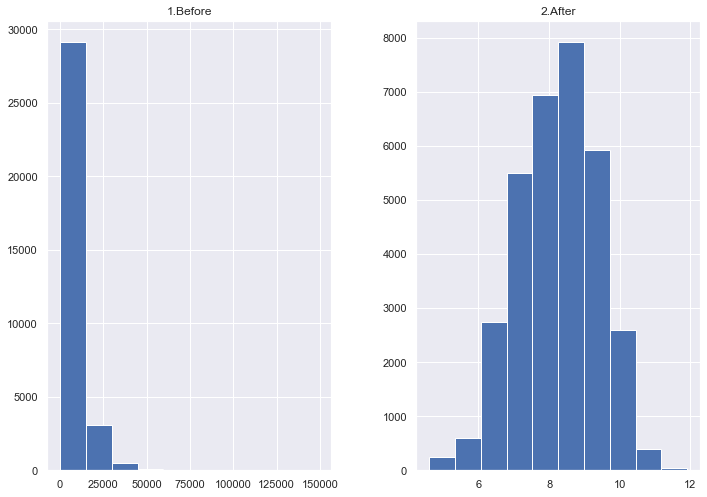

In [104]:
prices.hist()

In [105]:
# transforming price as a logarithmic value
y1 = np.log(y1)

In [106]:
x_train, x_test, y_train, y_test = train_test_split(x1,y1, test_size = 0.3, random_state = 3)

In [107]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(23018, 300) (9866, 300) (23018,) (9866,)


BaseLine Model for Omitted Data

In [108]:
# finding the mean for test data value
base_pred =  np.mean(y_test)
print(base_pred)

8.249615787653337


In [109]:
# repeating the same value till length of test data
base_pred = np.repeat(base_pred, len(y_test))

In [110]:
# finding RMSE
base_root_mean_square_error = np.sqrt(mean_squared_error(y_test, base_pred))
print(base_root_mean_square_error)

1.1274483657478247


# LINEAR REGRESSION WITH OMITTED DATA

In [111]:
#  setting intercept as true
lgr = LinearRegression(fit_intercept = True)

In [112]:
# model
model_line1 = lgr.fit(x_train, y_train)

In [113]:
# predicting model on test set
cars_prediction_line1 = lgr.predict(x_test)

In [114]:
print(cars_prediction_line1)

[8.43257524 9.78032094 8.84198777 ... 8.7016597  7.50062221 7.90248496]


In [115]:
# computing MSE and RMSE
line_mse1 = mean_squared_error(y_test, cars_prediction_line1)

In [116]:
line_rmse1 = np.sqrt(line_mse1)

In [117]:
print(line_rmse1)

0.5455481266513817


In [118]:
# R squared value
r2_lin_test1 = model_line1.score(x_test, y_test)

In [119]:
r2_lin_train1 = model_line1.score(x_train, y_train)

In [120]:
print(r2_lin_test1, r2_lin_train1)

0.7658615091649263 0.7800936978183916


In [121]:
# Regression diagnostic- Residual plot analysis
residuals1 = y_test-cars_prediction_line1

<AxesSubplot:ylabel='price'>

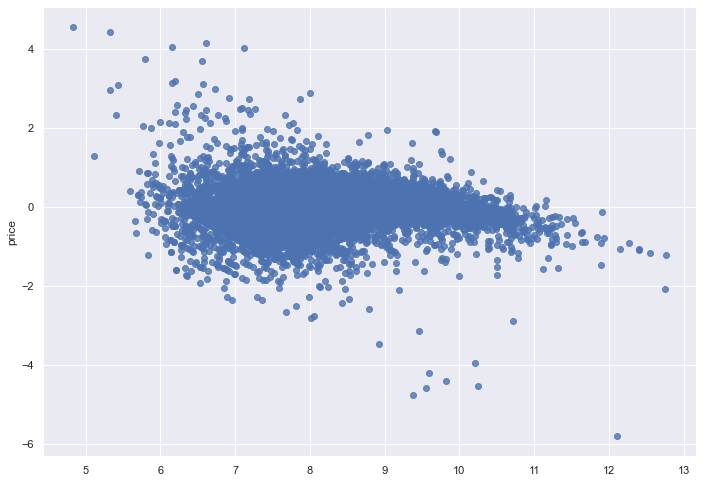

In [122]:
sns.regplot(x = cars_prediction_line1, y = residuals1, scatter = True, fit_reg = False, data = cars)

In [123]:
residuals1.describe()

count   9866.000
mean       0.003
std        0.546
min       -5.796
25%       -0.261
50%        0.041
75%        0.302
max        4.547
Name: price, dtype: float64

# RANDOM FOREST WITH OMITTED DATA

In [124]:
# model parameter
rf = RandomForestRegressor(n_estimators = 100, max_features = 'auto', max_depth = 100, min_samples_split = 10,
                            min_samples_leaf = 4, random_state = 1)

In [125]:
# model
model_rf1 = rf.fit(x_train, y_train)

In [126]:
# predicting model on test set
cars_predictions_rf1 = rf.predict(x_test)

In [127]:
# computing mse and rmse
rf_mse1 = mean_squared_error(y_test, cars_predictions_rf1)

In [128]:
rf_rmse1 = np.sqrt(rf_mse1)

In [129]:
print(rf_rmse1)

0.4360736289370223


In [130]:
# R squared value
r2_rf_test1 = model_rf1.score(x_test, y_test)

In [131]:
# R squared value
r2_rf_train1 = model_rf1.score(x_train, y_train)

In [132]:
print(r2_rf_test1, r2_rf_train1)

0.8504018147750623 0.9202494705146291


# MODEL BUILDING WITH IMPUTED DATA

In [133]:
# filling missing data
cars_imputed = cars.apply(lambda x:x.fillna(x.median()) if x.dtype=='float' else x.fillna(x.value_counts().index[0]))

In [134]:
cars_imputed.isnull().sum()

price                0
vehicleType          0
gearbox              0
powerPS              0
model                0
kilometer            0
fuelType             0
brand                0
notRepairedDamage    0
Age                  0
dtype: int64

In [135]:
# converting categorical variable to dummy variable
cars_imputed = pd.get_dummies(cars_imputed, drop_first = True)

In [136]:
cars_imputed.shape

(42772, 304)

Model Building With Imputed Data

In [137]:
# separating input and output features
x2 = cars_imputed.drop(['price'], axis = 'columns', inplace = False)

In [138]:
y2 = cars_imputed['price']

In [139]:
# plotting the variable price
prices = pd.DataFrame({"1.Before":y2, "2.After":np.log(y2)})

array([[<AxesSubplot:title={'center':'1.Before'}>,
        <AxesSubplot:title={'center':'2.After'}>]], dtype=object)

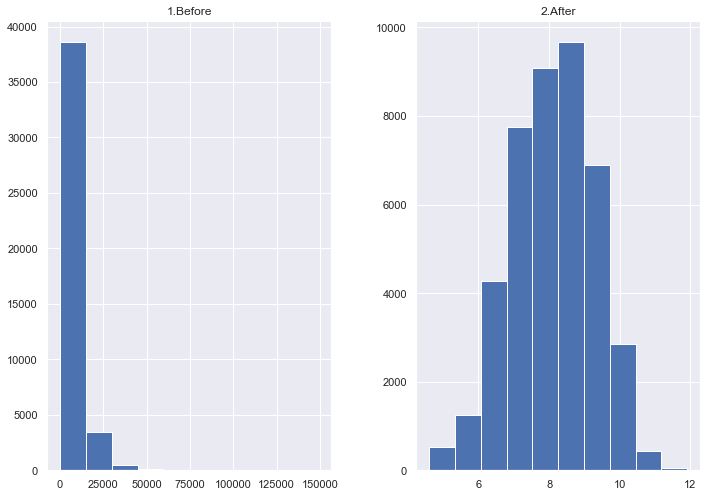

In [140]:
prices.hist()

In [141]:
# transforming the price as logarithmic value
y2 = np.log(y2)

In [142]:
# splitting data into test and train
x_train1, x_test1, y_train1, y_test1 = train_test_split(x2,y2, test_size = 0.3, random_state = 3)

In [143]:
print(x_train1.shape, x_test1.shape, y_train1.shape, y_test1.shape)

(29940, 303) (12832, 303) (29940,) (12832,)


BASELINE MODEL FOR IMPUTED DATA

In [144]:
# FINDING THE MEAN FOR TEST DATA VALUE
base_pred = np.mean(y_test1)
print(base_pred)

8.068391740519193


In [145]:
# REPEATING THE SAME VALUE TILL THE LENGTH OF THE TEST DATA
base_pred = np.repeat(base_pred, len(y_test1))

In [146]:
# FINDING THE RMSE
base_root_mean_square_error_impute = np.sqrt(mean_squared_error(y_test1, base_pred))
print(base_root_mean_square_error_impute)

1.1884349112889792


LINEAR REGRESSION WITH IMPUTED DATA

In [147]:
# SETTING INTERCEPT AS TRUE
lgr2 = LinearRegression(fit_intercept = True)

In [148]:
# MODEL
model_lin2 = lgr2.fit(x_train1, y_train1)

In [149]:
# PREDICTING MODEL ON TEST SET
cars_prediction_lin2 = lgr2.predict(x_test1)

In [150]:
# COMPUTING MSE AND RMSE
lin_mse2 = mean_squared_error(y_test1, cars_prediction_lin2)

In [151]:
lin_rmse2 = np.sqrt(lin_mse2)

In [152]:
print(lin_rmse2)

0.6483956449231337


In [153]:
# R SQUARED VALUE

In [154]:
r2_lin_test2 = model_lin2.score(x_test1, y_test1)

In [155]:
r2_lin_train2 = model_lin2.score(x_train1, y_train1)

In [156]:
print(r2_lin_test2, r2_lin_train2)

0.7023339008631146 0.7071658736894362


# Random forest method with imputed data

In [157]:
# model parameter
rf2 = RandomForestRegressor(n_estimators = 100, max_features = 'auto', max_depth = 100, min_samples_split = 10,
                            min_samples_leaf = 4, random_state = 1)

In [158]:
# model
model_rf2 = rf2.fit(x_train1, y_train1)

In [159]:
# predicting model on the test set
cars_prediction_rf2 = rf2.predict(x_test1)

In [160]:
# COMPUTING MSE AND RMSE 
rf_mse2 = mean_squared_error(y_test1, cars_prediction_rf2)

In [161]:
rf_rmse2 = np.sqrt(rf_mse2)

In [162]:
print(rf_rmse2)

0.494313994408829


In [163]:
# R SQUARED VALUE
r2_rf_test2 = model_rf2.score(x_test1, y_test1)

In [164]:
r2_rf_train2 = model_rf2.score(x_train1, y_train1)

In [165]:
print(r2_rf_test2, r2_rf_train2)

0.8269964521311131 0.9024289431669166


# FINAL OUTPUT OF PREDICTION

In [166]:
print("Metrics for model built from data where missing values were omitted")
print("R squared value for train from Linear Regression= %s"% r2_lin_train1)
print("R squared value for test from Linear Regression= %s"% r2_lin_test1)
print("R squared value for train From Random Forest= %s"% r2_rf_train1)
print("R squared value for test from Random Forest= %s"% r2_rf_test1)
print("Base RMSE of model built from data where missing values were omitted= %s"% base_root_mean_square_error)
print("RMSE value for test from Linear Regression= %s"% line_rmse1)
print("RMSE value for test from Random Forest= %s"% rf_rmse1)
print("\n\n")
print("Metrics for model built from data where missing values were imputted")
print("R squared value for train from Linear Regression= %s"% r2_lin_train2)
print("R squared value for test from Linear Regression= %s"% r2_lin_test2)
print("R squared value for train From Random Forest= %s"% r2_rf_train2)
print("R squared value for test from Random Forest= %s"% r2_rf_test2)
print("Base RMSE of model built from data where missing values were omitted= %s"% base_root_mean_square_error_impute)
print("RMSE value for test from Linear Regression= %s"% lin_rmse2)
print("RMSE value for test from Random Forest= %s"% rf_rmse2)

Metrics for model built from data where missing values were omitted
R squared value for train from Linear Regression= 0.7800936978183916
R squared value for test from Linear Regression= 0.7658615091649263
R squared value for train From Random Forest= 0.9202494705146291
R squared value for test from Random Forest= 0.8504018147750623
Base RMSE of model built from data where missing values were omitted= 1.1274483657478247
RMSE value for test from Linear Regression= 0.5455481266513817
RMSE value for test from Random Forest= 0.4360736289370223



Metrics for model built from data where missing values were imputted
R squared value for train from Linear Regression= 0.7071658736894362
R squared value for test from Linear Regression= 0.7023339008631146
R squared value for train From Random Forest= 0.9024289431669166
R squared value for test from Random Forest= 0.8269964521311131
Base RMSE of model built from data where missing values were omitted= 1.1884349112889792
RMSE value for test from Lin